In [1]:
import pandas as pd

#와인 데이터 읽고 저장
wine = pd.read_csv('https://bit.ly/wine_csv_data')

#정보/통계 확인
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [2]:
#입력데이터/타깃 정의
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

#훈련/테스트 분리
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

#shape 출력
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [4]:
from sklearn.tree import DecisionTreeClassifier

#max_depth=4 결정트리 생성
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(train_input, train_target)

#점수 확인
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8572253223013276
0.8484615384615385


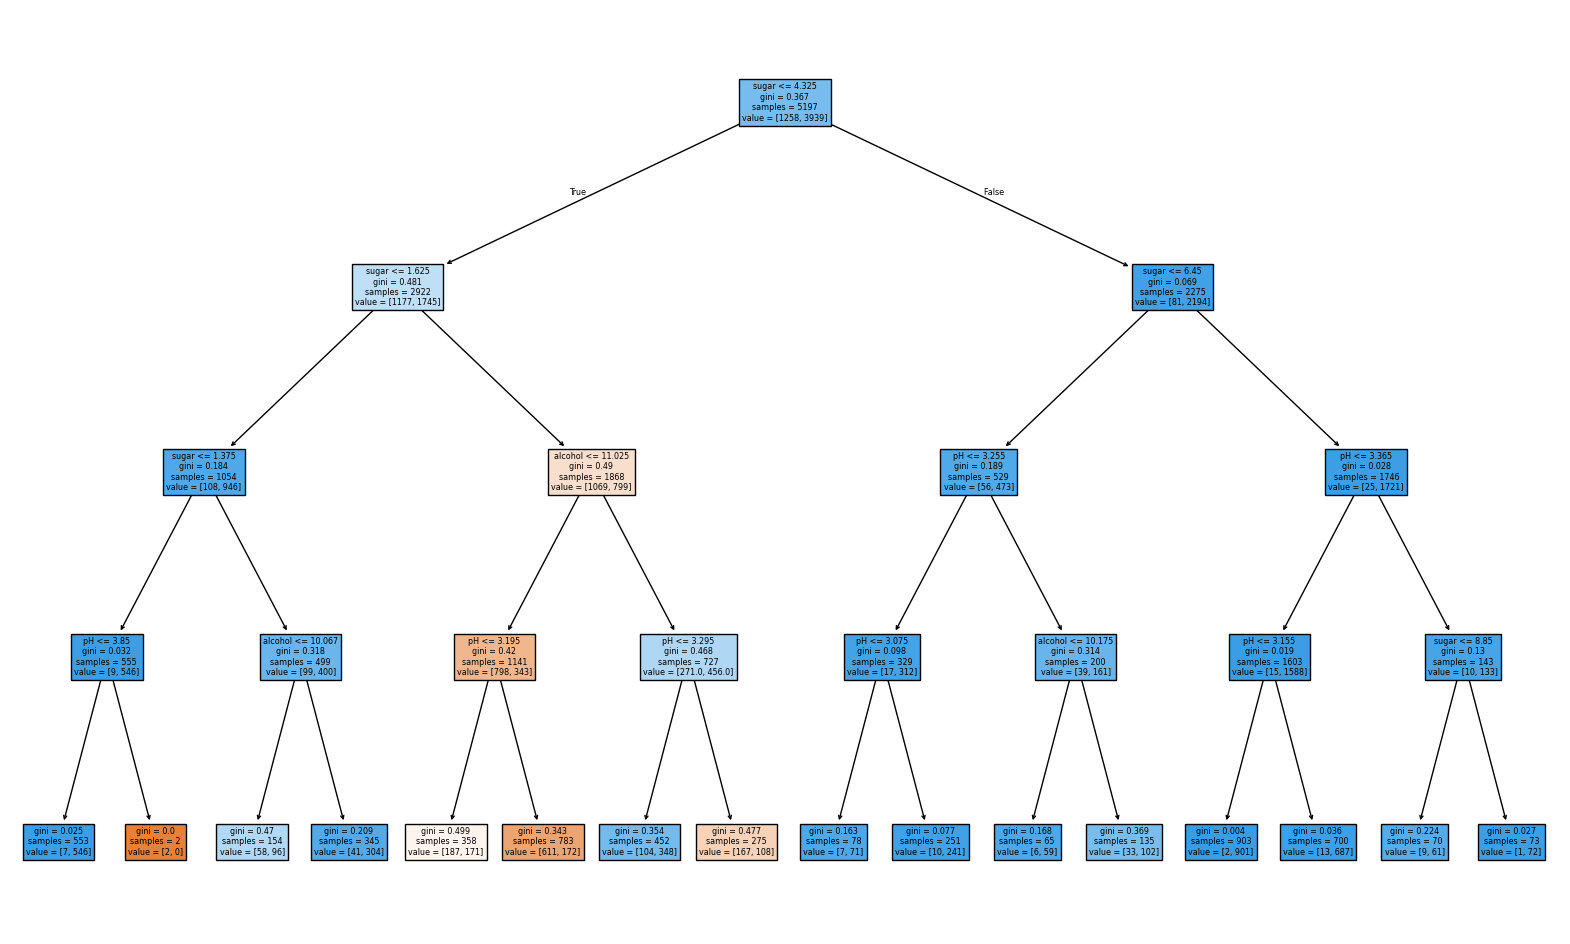

In [8]:
#결정트리 그래프 그리기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,12))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [10]:
#지니불순도 = 1- (음성클래스의 비율^2 + 양성클래스의 비율^2)
#깊이 1의 지니불순도 계산
dpt1_left_gini = 1-((1177/2922)**2 + (1745/2922)**2)
dpt2_right_gini = 1-((81/2275)**2 + (2194/2275)**2)
print(dpt1_left_gini, dpt2_right_gini)

0.481106768216382 0.06867344523608265
